# CIS 508 Group Project 
Team 2 <br/>
Members:
1. Janice Fong
2. Josh Quintana
3. Melvin R Torres Pereira
4. Tanipriya Lakshimi Narayana

## Data Dictionary
LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).

PAY_1 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the
repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

In [1]:
# import data set and show the first 5 rows and the shape of the data set
import pandas as pd
defaulted = pd.read_csv('BestCard_data.csv')
defaulted.head(), defaulted.shape

(              ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  \
 0  798fc410-45c1      20000    2          2         1   24      2      2   
 1  8a8c8f3b-8eb4     120000    2          2         2   26     -1      2   
 2  85698822-43f5      90000    2          2         2   34      0      0   
 3  0737c11b-be42      50000    2          2         1   37      0      0   
 4  3b7f77cc-dbc0      50000    1          2         1   57     -1      0   
 
    PAY_3  PAY_4  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
 0     -1     -1  ...         0         0         0   
 1      0      0  ...      1000         0      2000   
 2      0      0  ...      1000      1000      5000   
 3      0      0  ...      1100      1069      1000   
 4     -1      0  ...      9000       689       679   
 
    default payment next month  EDUCATION_CAT  graduate school  high school  \
 0                           1     university                0            0   
 1                           1     university 

In [2]:
# see how many people defaulted (5914 people defaulted)
defaulted['default payment next month'].value_counts()

default payment next month
0    20750
1     5914
Name: count, dtype: int64

In [3]:
# Check class imbalance
defaulted['default payment next month'].value_counts(normalize=True)

default payment next month
0    0.778203
1    0.221797
Name: proportion, dtype: float64

In [4]:
# Feature Engineering: Debt-to-Limit Ratio
# Higher ratio could mean higher risk of default
#defaulted['debt_ratio'] = (defaulted[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)) / defaulted['LIMIT_BAL']
#defaulted['repayment_ratio'] = (defaulted[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)) / defaulted['LIMIT_BAL']
# Feature Engineering: Late Payments and Credit Utilization
defaulted['late_payments'] = (defaulted[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)
defaulted['credit_utilization'] = defaulted['BILL_AMT1'] / defaulted['LIMIT_BAL']

In [5]:
# Drop unnecessary columns and split into features and target
#x = defaulted.drop(columns=['default payment next month','ID', 'EDUCATION_CAT'])
x = defaulted.drop(columns=['default payment next month','ID', 'EDUCATION_CAT', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'graduate school', 'high school', 'others', 'university', 'none', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
# Setting target variable default payment next month
y = defaulted['default payment next month']

## Scaler and Encoding

In [6]:
# importing standard scaler from sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Creating a StandardScaler object
scaler = StandardScaler()

# Standardizing the predictor variables (X) by transforming them to have a mean of 0 and a standard deviation of 1
# The transformed values are stored in a new DataFrame called 'x_standardized'
x_standarized = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x_standarized.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,late_payments,credit_utilization
0,-1.139267,0.811301,0.211732,-1.066310,-1.246871,1.790797,-0.644999,-0.341581,0.750224,-0.554286
1,-0.369071,0.811301,0.211732,0.851409,-1.030122,-0.871733,-0.661717,-0.341581,0.750224,-0.975559
2,-0.600130,0.811301,0.211732,0.851409,-0.163127,0.015777,-0.301046,-0.250678,-0.536784,-0.240147
3,-0.908208,0.811301,0.211732,-1.066310,0.161997,0.015777,-0.059970,-0.221814,-0.536784,1.254660
4,-0.908208,-1.232588,0.211732,-1.066310,2.329485,-0.871733,-0.581114,-0.221814,-0.536784,-0.610950


In [7]:
# Initialize the LabelEncoder object to encode categorical labels into numeric values
label_encoded = LabelEncoder()

# Fit the label encoder to the 'default' column and transform the categorical values into numeric labels.
y = label_encoded.fit_transform(defaulted['default payment next month'].values)
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

## Splitting Data

In [8]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (75-25 split)
# X contains the features (input variables) and y contains the target variable (output labels)
# 75% of the data will be used for training (x_train, y_train), and 25% will be used for testing (x_test, y_test)
# random_state=0 ensures the split is reproducible, meaning the same split is generated each time
x_train, x_test, y_train, y_test = train_test_split(x_standarized, y, test_size=0.25, random_state=0)


## Testing Multiple Models
Takes about 1 min to run

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5240
           1       0.38      0.41      0.40      1426

    accuracy                           0.73      6666
   macro avg       0.61      0.62      0.61      6666
weighted avg       0.74      0.73      0.74      6666

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5240
           1       0.47      0.59      0.52      1426

    accuracy                           0.77      6666
   macro avg       0.67      0.70      0.68      6666
weighted avg       0.79      0.77      0.78      6666

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5240
           1       0.64      0.37      0.47      1426

    accuracy                           0.82      6666
   macro avg       0.74      0.66      0.68      6666
we

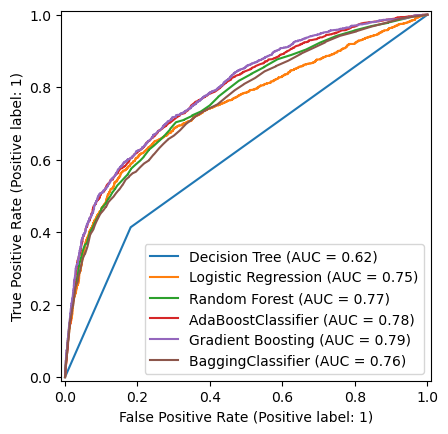

In [9]:
# Import necessary libraries for model training and evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, RocCurveDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Running multiple different models
dtree = DecisionTreeClassifier(random_state = 0)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, C=10, penalty='l2', solver='liblinear', random_state=0)
randforest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)
boost = AdaBoostClassifier(n_estimators=100, random_state=0,algorithm='SAMME')
bagging = BaggingClassifier(n_estimators=100, random_state=0)
gradboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=0)

# Train and evaluate models
models = {'Decision Tree': dtree,
          'Logistic Regression': log_reg,
          'Random Forest': randforest,
          'AdaBoostClassifier': boost,
          'Gradient Boosting': gradboost,
          'BaggingClassifier': bagging
          }

# Plot ROC curve for each model
fig, ax = plt.subplots()

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, name=name)

## Testing Multiple Models with Hyperparameter Tuning

Approximately 1 hour to run

In [10]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,RocCurveDisplay, f1_score # to evaluate model performance
import matplotlib.pyplot as plt

best_param = {}
tuned_models = {}

In [11]:
# all hyperparameter variables to be tuned for each model
def get_hyperparameters(trial, model_name, params_to_use):
    param = {"random_state": 0}
    if params_to_use and model_name != "Bagging":
        param.update(params_to_use)

    if model_name == "LogisticRegression":
        if trial is not None:
            param["C"] = trial.suggest_float("C", 0.01, 0.02, log=True)# Regularization strength
        param["penalty"] =  "l2"
        param["class_weight"]="balanced"
        param["max_iter"]= 1000
        param["solver"]= "liblinear" 
    elif model_name == "DecisionTree":
        if trial is not None:
            param["max_depth"] = trial.suggest_int("max_depth", 5, 10)
            param["min_samples_split"] = trial.suggest_int("min_samples_split", 5, 10)
            param["min_samples_leaf"] = trial.suggest_int("min_samples_leaf", 1, 4)
    elif model_name == "Bagging":
        if trial is not None:
            param["estimator"] = DecisionTreeClassifier(
                max_depth=trial.suggest_int("max_depth", 8, 10),
                min_samples_split=trial.suggest_int("min_samples_split", 5, 10),
                min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 4),
                random_state=42
            )
        else:
            param["estimator"] = DecisionTreeClassifier(
                max_depth=params_to_use.get('max_depth'),
                min_samples_split=params_to_use.get('min_samples_split'),
                min_samples_leaf=params_to_use.get('min_samples_leaf'),
                random_state=42,
            )
        param["n_estimators"] = 100
    elif model_name == "AdaBoost":
        if trial is not None:
            param["learning_rate"] = trial.suggest_float("learning_rate", 0.01, 0.10)
        param["n_estimators"] = 100
        param["algorithm"] = 'SAMME'
    elif model_name == "GradientBoosting":
        if trial is not None:
            param["learning_rate"] = trial.suggest_float("learning_rate", 0.05, 0.10)
            param["max_depth"] = trial.suggest_int("max_depth", 3, 7)
            param["min_samples_split"] = trial.suggest_int("min_samples_split", 2, 4)
            param["min_samples_leaf"] = trial.suggest_int("min_samples_leaf", 1, 3)
        param["n_estimators"] = 100
    elif model_name == "RandomForest":
        if trial is not None:
            param["max_depth"] = trial.suggest_int("max_depth", 5, 10)
            param["min_samples_split"] = trial.suggest_int("min_samples_split", 2, 4)
            param["min_samples_leaf"] = trial.suggest_int("min_samples_leaf", 1, 3)
        param["n_estimators"] = 100
        param["class_weight"] = "balanced"
    else:
        raise ValueError(f"Unknown model name: {model_name}")
    
    return param

In [12]:
# Objective function 
# Core function to run hyperparameter tuning
def objective(trial, model_name, model_class):
    hyperparameters = get_hyperparameters(trial, model_name,None)
    model = model_class(**hyperparameters)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    return f1

In [13]:
# Optuna optimization for each model
# model chosen to run the hyperparameter tuning with optuna
models = {
    "LogisticRegression": LogisticRegression,
    "DecisionTree": DecisionTreeClassifier,
    "Bagging": BaggingClassifier,
    "AdaBoost": AdaBoostClassifier,
    "GradientBoosting": GradientBoostingClassifier,
    "RandomForest": RandomForestClassifier,
}

for model_name, model_class in models.items():
    print(model_name)

    # function to call the objective function of Optuna
    def lambda_objective(trial):
        return objective(trial, model_name, model_class)
    
    # initiate Optuna and run 100 times to find best parameter values
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda_objective, n_trials=100)

    #print(f"Best trial for {model_name}:")
    trial = study.best_trial

    # retrieve the best parameter values from all the tuning
    params_to_use = get_hyperparameters(None, model_name,trial.params)

    if model_name == 'Bagging' or model_name == 'LogisticRegression':
        params_to_use.pop('model', None)

    # initiate best model
    best_model = model_class(**params_to_use)
    tuned_models['Tuned'+model_name] = best_model
    best_param [model_name] = params_to_use

[I 2025-03-01 13:17:27,344] A new study created in memory with name: no-name-cc5ea472-f87e-4bb7-a695-1e460c707e85
[I 2025-03-01 13:17:27,471] Trial 0 finished with value: 0.5202598206000618 and parameters: {'C': 0.011167393643297009}. Best is trial 0 with value: 0.5202598206000618.


LogisticRegression


[I 2025-03-01 13:17:27,582] Trial 1 finished with value: 0.5205818632002476 and parameters: {'C': 0.012773905665799326}. Best is trial 1 with value: 0.5205818632002476.
[I 2025-03-01 13:17:27,690] Trial 2 finished with value: 0.5207430340557275 and parameters: {'C': 0.019065932085305468}. Best is trial 2 with value: 0.5207430340557275.
[I 2025-03-01 13:17:27,801] Trial 3 finished with value: 0.5205818632002476 and parameters: {'C': 0.012093582165129797}. Best is trial 2 with value: 0.5207430340557275.
[I 2025-03-01 13:17:27,900] Trial 4 finished with value: 0.5207430340557275 and parameters: {'C': 0.01935588018838103}. Best is trial 2 with value: 0.5207430340557275.
[I 2025-03-01 13:17:28,006] Trial 5 finished with value: 0.5198019801980198 and parameters: {'C': 0.010190915095089717}. Best is trial 2 with value: 0.5207430340557275.
[I 2025-03-01 13:17:28,118] Trial 6 finished with value: 0.5204207920792079 and parameters: {'C': 0.011520967115716568}. Best is trial 2 with value: 0.52074

DecisionTree


[I 2025-03-01 13:17:39,923] Trial 1 finished with value: 0.4933160845191893 and parameters: {'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.49736842105263157.
[I 2025-03-01 13:17:40,106] Trial 2 finished with value: 0.49670908293111016 and parameters: {'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.49736842105263157.
[I 2025-03-01 13:17:40,315] Trial 3 finished with value: 0.49827288428324695 and parameters: {'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.49827288428324695.
[I 2025-03-01 13:17:40,530] Trial 4 finished with value: 0.4939655172413793 and parameters: {'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.49827288428324695.
[I 2025-03-01 13:17:40,704] Trial 5 finished with value: 0.4933160845191893 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 3 w

Bagging


[I 2025-03-01 13:18:27,398] Trial 0 finished with value: 0.4770063119927863 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.4770063119927863.
[I 2025-03-01 13:18:46,113] Trial 1 finished with value: 0.47816298964430437 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.47816298964430437.
[I 2025-03-01 13:19:03,708] Trial 2 finished with value: 0.479963980189104 and parameters: {'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.479963980189104.
[I 2025-03-01 13:19:21,625] Trial 3 finished with value: 0.4785553047404063 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.479963980189104.
[I 2025-03-01 13:19:38,047] Trial 4 finished with value: 0.4751934456076468 and parameters: {'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 2 with va

AdaBoost


[I 2025-03-01 13:35:29,018] Trial 0 finished with value: 0.45797922568460814 and parameters: {'learning_rate': 0.025920063328512405}. Best is trial 0 with value: 0.45797922568460814.
[I 2025-03-01 13:35:30,982] Trial 1 finished with value: 0.45797922568460814 and parameters: {'learning_rate': 0.01676290482507299}. Best is trial 0 with value: 0.45797922568460814.
[I 2025-03-01 13:35:33,043] Trial 2 finished with value: 0.44433781190019195 and parameters: {'learning_rate': 0.05418626046964299}. Best is trial 0 with value: 0.45797922568460814.
[I 2025-03-01 13:35:35,086] Trial 3 finished with value: 0.45797922568460814 and parameters: {'learning_rate': 0.03560314868183879}. Best is trial 0 with value: 0.45797922568460814.
[I 2025-03-01 13:35:37,270] Trial 4 finished with value: 0.45797922568460814 and parameters: {'learning_rate': 0.014911055925686931}. Best is trial 0 with value: 0.45797922568460814.
[I 2025-03-01 13:35:39,434] Trial 5 finished with value: 0.44294655753490614 and paramet

GradientBoosting


[I 2025-03-01 13:38:46,672] Trial 0 finished with value: 0.485972850678733 and parameters: {'learning_rate': 0.08690032552747548, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.485972850678733.
[I 2025-03-01 13:38:56,783] Trial 1 finished with value: 0.4831612034126628 and parameters: {'learning_rate': 0.06815943150151652, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.485972850678733.
[I 2025-03-01 13:39:06,610] Trial 2 finished with value: 0.4785330948121646 and parameters: {'learning_rate': 0.09951958727457853, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.485972850678733.
[I 2025-03-01 13:39:12,826] Trial 3 finished with value: 0.47361174850849014 and parameters: {'learning_rate': 0.05265875573038775, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.485972850678733.
[I 2025-03-01 13:39:17,555] Tria

RandomForest


[I 2025-03-01 13:50:57,541] Trial 0 finished with value: 0.5332157554379776 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.5332157554379776.
[I 2025-03-01 13:51:00,256] Trial 1 finished with value: 0.5369913686806412 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.5369913686806412.
[I 2025-03-01 13:51:03,183] Trial 2 finished with value: 0.535512256442489 and parameters: {'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.5369913686806412.
[I 2025-03-01 13:51:05,216] Trial 3 finished with value: 0.5332157554379776 and parameters: {'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.5369913686806412.
[I 2025-03-01 13:51:07,695] Trial 4 finished with value: 0.5395488721804511 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 4 with va

In [14]:
best_param # best parameter for each model

{'LogisticRegression': {'random_state': 0,
  'C': 0.019065932085305468,
  'penalty': 'l2',
  'class_weight': 'balanced',
  'max_iter': 1000,
  'solver': 'liblinear'},
 'DecisionTree': {'random_state': 0,
  'max_depth': 8,
  'min_samples_split': 10,
  'min_samples_leaf': 3},
 'Bagging': {'random_state': 0,
  'estimator': DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=6,
                         random_state=42),
  'n_estimators': 100},
 'AdaBoost': {'random_state': 0,
  'learning_rate': 0.025920063328512405,
  'n_estimators': 100,
  'algorithm': 'SAMME'},
 'GradientBoosting': {'random_state': 0,
  'learning_rate': 0.08690032552747548,
  'max_depth': 5,
  'min_samples_split': 3,
  'min_samples_leaf': 1,
  'n_estimators': 100},
 'RandomForest': {'random_state': 0,
  'max_depth': 8,
  'min_samples_split': 3,
  'min_samples_leaf': 1,
  'n_estimators': 100,
  'class_weight': 'balanced'}}

--- TunedLogisticRegression ---
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      5240
           1       0.47      0.59      0.52      1426

    accuracy                           0.77      6666
   macro avg       0.67      0.70      0.68      6666
weighted avg       0.79      0.77      0.78      6666

Precision: 0.4661862527716186
Recall: 0.5897615708274895
F1-score: 0.5207430340557275
--- TunedDecisionTree ---
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5240
           1       0.62      0.42      0.50      1426

    accuracy                           0.82      6666
   macro avg       0.74      0.67      0.70      6666
weighted avg       0.80      0.82      0.81      6666

Precision: 0.6232948583420777
Recall: 0.4165497896213184
F1-score: 0.49936948297604034
--- TunedBagging ---
              precision    recall  f1-score   support

           0       0.85      0.95      

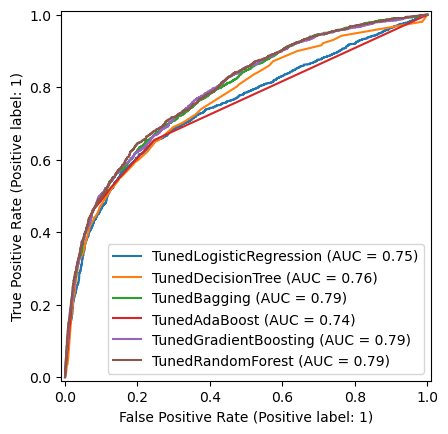

In [15]:
# Identify best model by comparing the F1 score
# the higher the F1 score, the better the model with imbalance data
from sklearn.metrics import precision_score, recall_score, f1_score

# Plot ROC curve for each model
fig, ax = plt.subplots()

# store best model name
best_model_name = None
best_f1_score = -1
for name, model in tuned_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"--- {name} ---")

    # Retrieve F1 score from Classification report
    # compare F1 score and find the best model
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score_class1 = report['1']['f1-score'] #f1 score of class 1
    if f1_score_class1 > best_f1_score:
        best_f1_score = f1_score_class1
        best_model_name = model_name
    print(classification_report(y_test, y_pred))

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, name=name)

print(f"Best model: {best_model_name} with F1-score (class 1): {best_f1_score}")


## Random Forest

In [16]:
# Retrieve thebest model
# In this case, it is Tuned Random Forest
forest = tuned_models.get("TunedRandomForest")

In [17]:
# Calculating the feature importance for the decision tree model
# tree.feature_importances_ gives the importance score for each feature used in the decision tree model
# The higher the score, the more important the feature is in making predictions
# Creating a DataFrame to display the feature importance with feature names (X.columns) as the index
importance_forest = pd.DataFrame(forest.feature_importances_, index=x.columns, columns=["Importance"])
importance_forest.sort_values(by=["Importance"], ascending=False)

,Importance
late_payments,0.328892
PAY_1,0.282259
credit_utilization,0.092655
BILL_AMT1,0.082460
PAY_AMT1,0.079849
LIMIT_BAL,0.073951
AGE,0.034021
EDUCATION,0.012942
SEX,0.006628
MARRIAGE,0.006342


In [18]:
# Use the trained Random Forest model to make predictions on the test set (x_test).
y_rf_pred = forest.predict(x_test)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))
print(classification_report(y_test, y_rf_pred))

RocCurveDisplay.from_estimator(forest, x_test, y_test, ax=ax, name="Random Forest")

Accuracy on training set: 0.783
Random Forest Accuracy on test set: 0.771
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      5240
           1       0.47      0.63      0.54      1426

    accuracy                           0.77      6666
   macro avg       0.68      0.72      0.69      6666
weighted avg       0.80      0.77      0.78      6666



In [19]:
# Import the cross_val_score function from scikit-learn to perform cross-validation and evaluate model performance.
from sklearn.model_selection import cross_val_score

# Cross validation by dividing the data into K-equal set.
# Perform 5-fold cross-validation on the decision tree model using the entire dataset (x, y) and store the accuracy scores for each fold.
scores_rf = cross_val_score(model, x, y, cv= 5)

# Print the accuracy scores for each fold of the cross-validation process.
print("Original accuracy scores of each fold: {}".format(scores_rf))

#A common way to summarize the cross-validation accuracy is to compute the "mean":
print("Original average cross-validation score: {:.2f}".format(scores_rf.mean()))


Original accuracy scores of each fold: [0.751922   0.74292143 0.7631727  0.78492406 0.78019505]
Original average cross-validation score: 0.76


## Deploy Model and Creating the Frontend of the app using Streamlit

In [20]:
# saving the model
# Import the pickle module to save and load Python objects.
#A pickle file is a file format used in Python to store serialized objects.
#Pickling refers to the process of converting a Python object (such as a model, list, dictionary, etc.)
#into a byte stream so that it can be saved to a file or transmitted over a network.
#The process of converting the byte stream back into the original object is called unpickling.

import pickle

# Open a file named 'classifier.pkl' in write-binary ('wb') mode to store the trained model.
pickle_out = open("classifier.pkl", mode = "wb")

# Use pickle to save the trained Logistic Regression model into the 'classifier.pkl' file.
#pickle.dump(model, pickle_out)
pickle.dump(forest, pickle_out)

# Close the file after saving the model to ensure the data is written and the file is properly closed.
pickle_out.close()

In [21]:
%%writefile app.py

# Create a new file named 'app.py' to save the code for the Streamlit app. It is important you use this
# magic function at the begining of the cell. Otherwise you will get error message.

# Import the Streamlit library to create the web app interface.
import pickle
import streamlit as st

# Load the trained model (classifier) from the 'classifier.pkl' file using pickle.
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

# Define the main function that sets up the layout and functionality of the Streamlit app.
def main():
    # Streamlit UI
    st.title("📊 Customer Default Prediction App")
    st.write("Predict whether a customer will default on their credit payments.")
    # User input form
    st.sidebar.header("Enter Customer Details")

    # Create input fields where users can enter data for prediction:
    SEX = st.sidebar.selectbox('Gender',("Male","Female"))
    MARRIAGE = st.sidebar.selectbox('Marital Status',("Married", "Single", "Others"))
    EDUCATION = st.sidebar.selectbox('Education Level',("Graduate School", "University", "High School", "Others"))
    LIMIT_BAL = st.sidebar.number_input("Credit Limit", min_value=1000, max_value=1000000, step=1000)
    AGE = st.sidebar.number_input("Age", min_value=18, max_value=100, step=1)
    PAY_1 = st.sidebar.slider("Most Recent Payment Status (-1: Paid in full, 1+: Late)", -2, 8, 0)
    BILL_AMT1 = st.sidebar.number_input("Most Recent Bill Amount", min_value=0, max_value=1000000, step=100)
    PAY_AMT1 = st.sidebar.number_input("Most Recent Payment Amount", min_value=0, max_value=1000000, step=100)
    late_payments = st.sidebar.number_input("Number of Late Payments in last 6 months", min_value=0, max_value=6, step=1)
    credit_utilization = BILL_AMT1/LIMIT_BAL
    result = ""


    # When the 'Predict Default Risk' button is clicked, call the prediction function and display the result.
    if st.button("Predict Default Risk"):
        result = prediction(LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, BILL_AMT1, PAY_AMT1, late_payments, credit_utilization)
        print(result)

# Define the function to make the prediction based on the input data from the user.
def prediction(LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, BILL_AMT1, PAY_AMT1, late_payments, credit_utilization):

    # Pre-process the input data to convert categorical values into numerical values:
    if SEX == "Male":
        SEX = 1
    else:
        SEX = 2

    if MARRIAGE == "Married":
        MARRIAGE = 1
    elif MARRIAGE == "Single":
        MARRIAGE = 2
    else:
        MARRIAGE = 0

    if EDUCATION == "Graduate School":
        EDUCATION = 1
    elif EDUCATION == "University":
        EDUCATION = 2
    elif EDUCATION == "High School":
        EDUCATION = 3
    else:
        EDUCATION = 4

    # Make the prediction using the trained classifier.
    mypred = classifier.predict(
        [[LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_1, BILL_AMT1, PAY_AMT1, late_payments, credit_utilization]])

    # Convert the prediction result into a human-readable format.
    if mypred == 1:
        pred = st.error(f"🚨 High Risk: The customer is likely to default! (Risk Score: {mypred})")
    else:
        pred = st.success(f"✅ Low Risk: The customer is unlikely to default. (Risk Score: {mypred})")
    return pred


# Check if the script is being run directly and call the main function to run the app.
if __name__=='__main__':
    main()

Overwriting app.py


In [22]:
!streamlit run app.py

^C
